In [16]:
# =====================
# Core Libraries
# =====================
import numpy as np
import pandas as pd

# =====================
# Visualization
# =====================
import seaborn as sns
import matplotlib.pyplot as plt

# =====================
# Preprocessing
# =====================
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer

# =====================
# Model Selection & Tuning
# =====================
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# =====================
# Regression Models
# =====================
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor

# =====================
# Classification Models
# =====================
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# =====================
# Pipelines
# =====================
from sklearn.pipeline import Pipeline

# =====================
# Metrics
# =====================
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve,
                             roc_auc_score, precision_score,
                             recall_score, f1_score,  accuracy_score)

# =====================
# Other Useful Tools
# =====================
from sklearn.datasets import make_regression
from numpy import log1p


In [2]:
data = pd.read_csv('train.csv')

In [5]:
data.drop(columns='id' , index=1,inplace=True)

In [12]:
def get_unique_value(column):
    unique = data[column].nunique()
    print(f"This is the number of unique values: {unique} for column '{column}'")

for column in data.columns:
    get_unique_value(column)

This is the number of unique values: 14 for column 'Temparature'
This is the number of unique values: 23 for column 'Humidity'
This is the number of unique values: 41 for column 'Moisture'
This is the number of unique values: 5 for column 'Soil Type'
This is the number of unique values: 11 for column 'Crop Type'
This is the number of unique values: 39 for column 'Nitrogen'
This is the number of unique values: 20 for column 'Potassium'
This is the number of unique values: 43 for column 'Phosphorous'
This is the number of unique values: 7 for column 'Fertilizer Name'


Data visualization

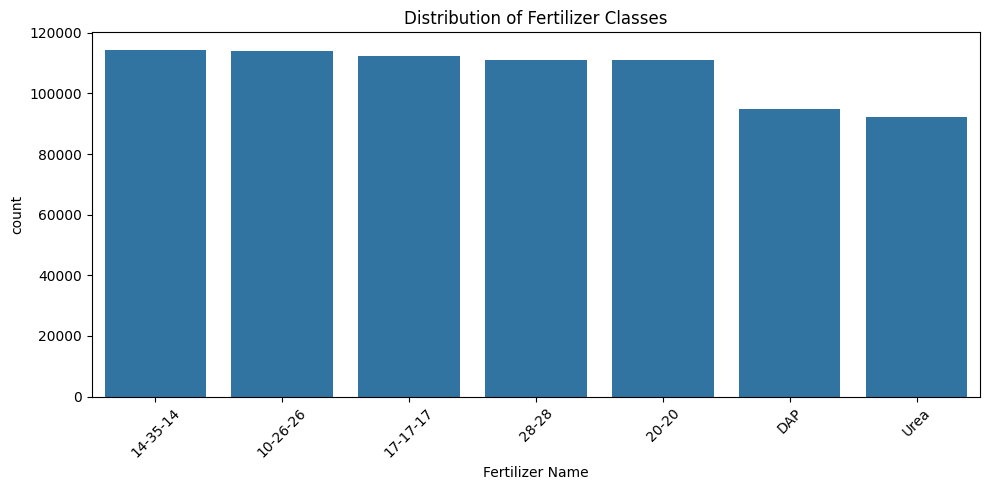

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Fertilizer Name', order=data['Fertilizer Name'].value_counts().index)
plt.title("Distribution of Fertilizer Classes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

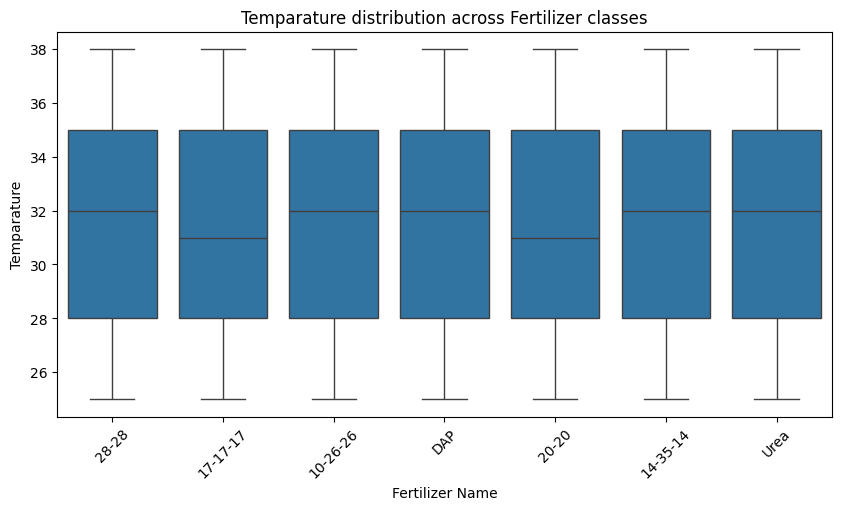

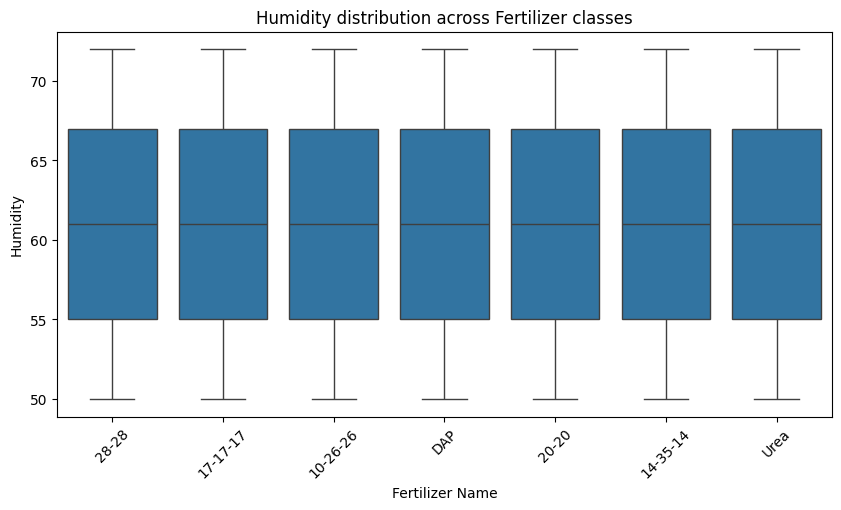

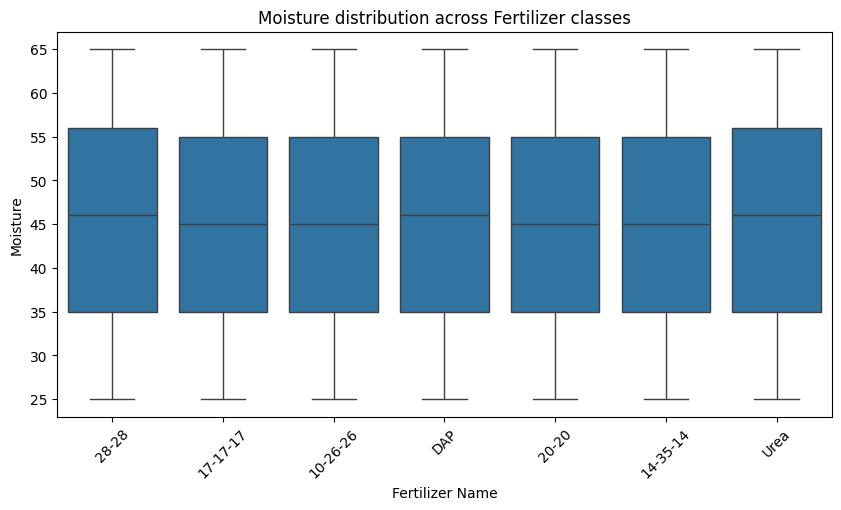

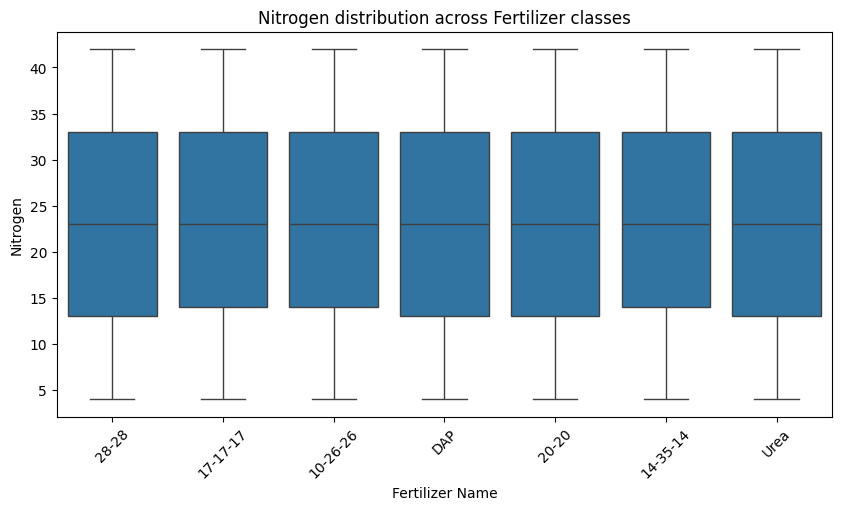

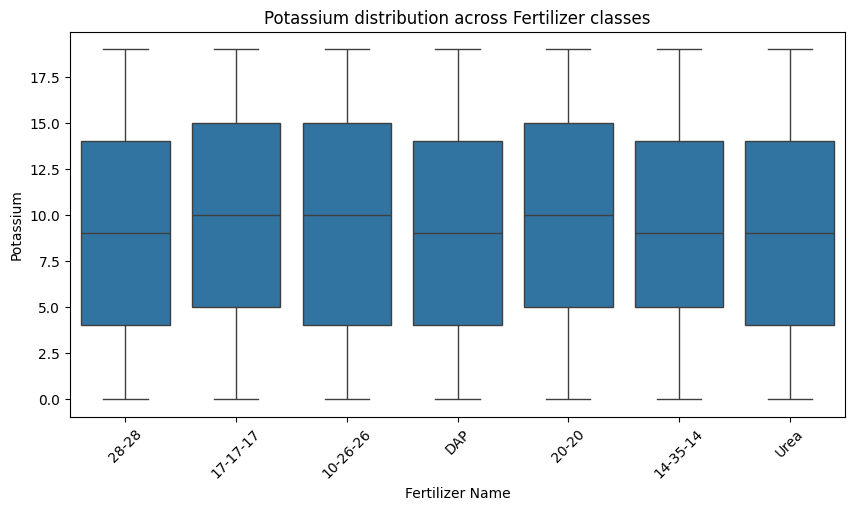

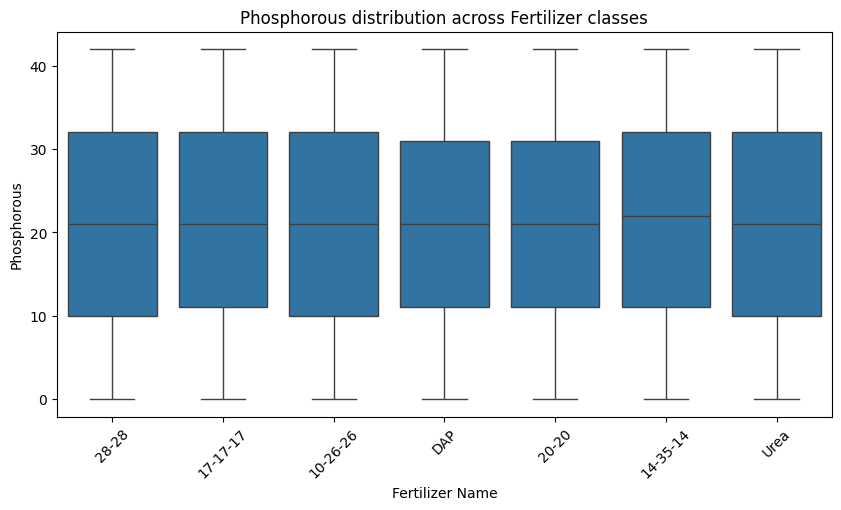

In [18]:
numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Fertilizer Name', y=col, data=data)
    plt.title(f"{col} distribution across Fertilizer classes")
    plt.xticks(rotation=45)
    plt.show()

Model training

In [ ]:
from catboost import CatBoostClassifier, Pool


# 1. Define features & target
X = data.drop('Fertilizer Name', axis=1)
y = data['Fertilizer Name']

# 2. Identify categorical columns by name 
cat_features = ['Crop Type', 'Soil Type']  

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define CatBoost model
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    verbose=50,
    task_type='CPU'  # or 'GPU' if available
)

# 5. Fit the model
model.fit(X_train, y_train)

# 6. Predict & evaluate
y_pred = model.predict(X_test)



0:	learn: 1.9450366	total: 1.48s	remaining: 12m 16s
50:	learn: 1.9363822	total: 1m 15s	remaining: 11m 5s
100:	learn: 1.9340952	total: 2m 25s	remaining: 9m 35s
150:	learn: 1.9313761	total: 3m 43s	remaining: 8m 37s
200:	learn: 1.9274375	total: 5m 9s	remaining: 7m 40s
250:	learn: 1.9240852	total: 6m 34s	remaining: 6m 31s
300:	learn: 1.9213852	total: 7m 59s	remaining: 5m 16s
350:	learn: 1.9188681	total: 9m 23s	remaining: 3m 59s
400:	learn: 1.9164340	total: 10m 51s	remaining: 2m 40s
450:	learn: 1.9142226	total: 12m 12s	remaining: 1m 19s
499:	learn: 1.9122223	total: 13m 34s	remaining: 0us


NameError: name 'accuracy_score' is not defined

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.18442666666666666


In [30]:
test = pd.read_csv('test.csv')


In [31]:
test_edit = test.drop(columns=["id"] , axis=1)

In [37]:
y_pred = model.predict(test_edit)

In [38]:
print(type(y_pred))
print(getattr(y_pred, "shape", "No shape"))
print(y_pred[:5])


<class 'numpy.ndarray'>
(250000, 1)
[['DAP']
 ['17-17-17']
 ['20-20']
 ['14-35-14']
 ['20-20']]


In [40]:
submission = pd.DataFrame({
    'id': test['id'].values,  # Ensure it's 1D too
    'Fertilizer Name': y_pred.ravel()
})
submission.to_csv("my_submission.csv", index=False)